# Objective:
#### In this project my goal is to predict the 2023 best picture award for The Oscars
#### I will mainly doing so by how other nominations play a part in the prediction
##### *However I added some other factors in this project in order to practice my eda skills


## Note:
### I gathered this data through https://m.imdb.com/list/ls076133705/ using webscrapper
### As this list has not been updated I repeatedly did the same process on other years. Sticking to imbd as my website of choice

In [236]:
# Loading Packages
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Exploring the data

In [237]:
oscars = pd.read_csv(r"C:\Users\kylep\Documents\Work things\Projects\Python\Oscars\EveryBestPicNom_Final_v2.csv")

In [238]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [239]:
oscars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3759 entries, 0 to 3758
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_number        3759 non-null   int64  
 1   Movie               298 non-null    object 
 2   Title               3759 non-null   object 
 3   Date                3759 non-null   int64  
 4   Viewership_Rating   3746 non-null   object 
 5   Runtime             3746 non-null   object 
 6   IMDb Rating         3754 non-null   float64
 7   Country of Origin   3759 non-null   object 
 8   Production Company  3759 non-null   object 
 9   Budget              3198 non-null   object 
 10  nominations         3759 non-null   object 
 11  Genre 1             3759 non-null   object 
 12  Genre 2             3384 non-null   object 
 13  Genre 3             2347 non-null   object 
 14  Gross Worldwide     2767 non-null   float64
dtypes: float64(2), int64(2), object(11)
memory usage: 440.6

In [240]:
oscars.head()

,movie_number,Movie,Title,Date,Viewership_Rating,Runtime,IMDb Rating,Country of Origin,Production Company,Budget,nominations,Genre 1,Genre 2,Genre 3,Gross Worldwide
0,1,NaN,Wings,1927,PG-13,2h 24m,7.6,United States,Paramount Famous Lasky Corporation,"$2,000,000 (estimated)","Best Picture, Production",Drama,Romance,War,746.0
1,1,NaN,Wings,1927,PG-13,2h 24m,7.6,United States,Paramount Famous Lasky Corporation,"$2,000,000 (estimated)","Best Effects, Engineering Effects",Drama,Romance,War,746.0
2,2,NaN,7th Heaven,1927,NaN,NaN,7.6,United States,Frank Borzage Production,"$1,300,000 (estimated)","Best Picture, Production",Drama,Romance,NaN,NaN
3,2,NaN,7th Heaven,1927,NaN,NaN,7.6,United States,Frank Borzage Production,"$1,300,000 (estimated)",Best Actress in a Leading Role,Drama,Romance,NaN,NaN
4,2,NaN,7th Heaven,1927,NaN,NaN,7.6,United States,Frank Borzage Production,"$1,300,000 (estimated)","Best Director, Dramatic Picture",Drama,Romance,NaN,NaN


In [241]:
oscars.tail()

,movie_number,Movie,Title,Date,Viewership_Rating,Runtime,IMDb Rating,Country of Origin,Production Company,Budget,nominations,Genre 1,Genre 2,Genre 3,Gross Worldwide
3754,590,Tár,Tár,2022,R,2h 38m,7.5,United States,Focus FeaturesStandard Film CompanyEMJAG Produ...,"$25,000,000 (estimated)",Best Original Screenplay,Drama,Music,NaN,28350185.0
3755,590,Tár,Tár,2022,R,2h 38m,7.5,United States,Focus FeaturesStandard Film CompanyEMJAG Produ...,"$25,000,000 (estimated)",Best Achievement in Cinematography,Drama,Music,NaN,28350185.0
3756,590,Tár,Tár,2022,R,2h 38m,7.5,United States,Focus FeaturesStandard Film CompanyEMJAG Produ...,"$25,000,000 (estimated)",Best Achievement in Film Editing,Drama,Music,NaN,28350185.0
3757,591,Women Talking,Women Talking,2022,PG-13,1h 44m,6.9,United States,Hear/Say ProductionsPlan B Entertainment,NaN,Best Adapted Screenplay,Drama,NaN,NaN,8959129.0
3758,591,Women Talking,Women Talking,2022,PG-13,1h 44m,6.9,United States,Hear/Say ProductionsPlan B Entertainment,NaN,Best Motion Picture of the Year,Drama,NaN,NaN,8959129.0


In [242]:
oscars.isnull().sum()

movie_number             0
Movie                 3461
Title                    0
Date                     0
Viewership_Rating       13
Runtime                 13
IMDb Rating              5
Country of Origin        0
Production Company       0
Budget                 561
nominations              0
Genre 1                  0
Genre 2                375
Genre 3               1412
Gross Worldwide        992
dtype: int64

In [243]:
oscars.dtypes

movie_number            int64
Movie                  object
Title                  object
Date                    int64
Viewership_Rating      object
Runtime                object
IMDb Rating           float64
Country of Origin      object
Production Company     object
Budget                 object
nominations            object
Genre 1                object
Genre 2                object
Genre 3                object
Gross Worldwide       float64
dtype: object

### As we can see there are alot  things I need to work on before I can begin to use machine learning techniques
#### The two major problems are: 
 - There are many nulls, in various columns
 - Some data types are not well sutied for that column
 - There are many duplicates

# Cleaning the data

### Fixing the movie and title columns

In [244]:
oscars[['Title','Movie']].head() # From what we can see here the Title column

,Title,Movie
0,Wings,NaN
1,Wings,NaN
2,7th Heaven,NaN
3,7th Heaven,NaN
4,7th Heaven,NaN


In [245]:
oscars['Title'].isnull().sum() #Checking if there are any nulls

0

In [246]:
oscars = oscars.drop('Movie', axis=1) #We dont need two title columns.Dropping the movie column

In [247]:
oscars.head()

,movie_number,Title,Date,Viewership_Rating,Runtime,IMDb Rating,Country of Origin,Production Company,Budget,nominations,Genre 1,Genre 2,Genre 3,Gross Worldwide
0,1,Wings,1927,PG-13,2h 24m,7.6,United States,Paramount Famous Lasky Corporation,"$2,000,000 (estimated)","Best Picture, Production",Drama,Romance,War,746.0
1,1,Wings,1927,PG-13,2h 24m,7.6,United States,Paramount Famous Lasky Corporation,"$2,000,000 (estimated)","Best Effects, Engineering Effects",Drama,Romance,War,746.0
2,2,7th Heaven,1927,NaN,NaN,7.6,United States,Frank Borzage Production,"$1,300,000 (estimated)","Best Picture, Production",Drama,Romance,NaN,NaN
3,2,7th Heaven,1927,NaN,NaN,7.6,United States,Frank Borzage Production,"$1,300,000 (estimated)",Best Actress in a Leading Role,Drama,Romance,NaN,NaN
4,2,7th Heaven,1927,NaN,NaN,7.6,United States,Frank Borzage Production,"$1,300,000 (estimated)","Best Director, Dramatic Picture",Drama,Romance,NaN,NaN


### Fixing Viwership Rating

In [248]:
oscars['Viewership_Rating'].isnull().sum()

13

In [249]:
oscars['Viewership_Rating'].value_counts() #Making every naan into not rated category

R            1140
PG-13         600
PG            522
Passed        510
Approved      408
Not Rated     253
G             202
Unrated        69
M/PG           17
X              10
GP              6
TV-MA           5
TV-PG           4
Name: Viewership_Rating, dtype: int64

In [250]:
oscars.Viewership_Rating = oscars.Viewership_Rating.fillna('Not Rated')

In [251]:
oscars['Viewership_Rating'].value_counts()#Checking if the not rated increased

R            1140
PG-13         600
PG            522
Passed        510
Approved      408
Not Rated     266
G             202
Unrated        69
M/PG           17
X              10
GP              6
TV-MA           5
TV-PG           4
Name: Viewership_Rating, dtype: int64

In [252]:
oscars['Viewership_Rating'].isnull().sum()

0

### Fixing Runtime by average

In [253]:
oscars['Runtime'].isnull().sum()

13

In [254]:
oscars['Runtime'].dtype

dtype('O')

#### The problem in this column is the values are not easily readable for the computer. What I wish to happen is to replace all nulls with average runtime. However in order to do so the compter need interger datatypes. So converting the the column will be the first step.

In [255]:
oscars.Runtime = oscars.Runtime.fillna('0h') # This allows the next cell to run without any errors

In [256]:
h = oscars['Runtime'].str.extract('(\d+)h', expand=False).astype(float) * 60 #extracting all strings before h and multiplying them by 60
m = oscars['Runtime'].str.extract('(\d+)m', expand=False).astype(float) #extracting all strings before m

oscars['Duration'] = h.add(m, fill_value=0).astype(int) #creating a new column by adding h and m variables and turing them into int data types

In [257]:
x = oscars.Duration[oscars.Duration != 0].mean() #Creating a variable x that gives the average duration for a movie
print("The average duration of a movie is, " + str(round(x, 2)) + " in minutes")

The average duration of a movie is, 130.76 in minutes


In [258]:
oscars.head()

,movie_number,Title,Date,Viewership_Rating,Runtime,IMDb Rating,Country of Origin,Production Company,Budget,nominations,Genre 1,Genre 2,Genre 3,Gross Worldwide,Duration
0,1,Wings,1927,PG-13,2h 24m,7.6,United States,Paramount Famous Lasky Corporation,"$2,000,000 (estimated)","Best Picture, Production",Drama,Romance,War,746.0,144
1,1,Wings,1927,PG-13,2h 24m,7.6,United States,Paramount Famous Lasky Corporation,"$2,000,000 (estimated)","Best Effects, Engineering Effects",Drama,Romance,War,746.0,144
2,2,7th Heaven,1927,Not Rated,0h,7.6,United States,Frank Borzage Production,"$1,300,000 (estimated)","Best Picture, Production",Drama,Romance,NaN,NaN,0
3,2,7th Heaven,1927,Not Rated,0h,7.6,United States,Frank Borzage Production,"$1,300,000 (estimated)",Best Actress in a Leading Role,Drama,Romance,NaN,NaN,0
4,2,7th Heaven,1927,Not Rated,0h,7.6,United States,Frank Borzage Production,"$1,300,000 (estimated)","Best Director, Dramatic Picture",Drama,Romance,NaN,NaN,0


In [259]:
oscars.loc[oscars["Duration"] == 0,"Duration"] = round(x, 2) #Filtering the data by 0 duration(which was previously nulls values)
                                                            #Then filling it the average duration(variable x)

In [260]:
oscars[['Runtime','Duration']].head(20)

,Runtime,Duration
0,2h 24m,144.00
1,2h 24m,144.00
2,0h,130.76
3,0h,130.76
4,0h,130.76
5,0h,130.76
6,0h,130.76
7,1h 24m,84.00
8,1h 40m,100.00
9,1h 40m,100.00


In [261]:
oscars = oscars.drop('Runtime', axis=1) # no longer need the runtime column

## Fixing IMDb rating column

In [262]:
oscars['IMDb Rating'].isnull().sum()

5

In [263]:
y = oscars[oscars["IMDb Rating"] != 0]["IMDb Rating"].mean()
print("The average IMDb rating for a best picture nominee is: " + str(round(y,2)))

The average IMDb rating for a best picture nominee is: 7.62


In [264]:
oscars['IMDb Rating'] = oscars['IMDb Rating'].fillna(round(y,2)) # Filling the nulls with average

## Checking Country of Origin

In [265]:
oscars['Country of Origin'].isnull().sum()

0

In [266]:
oscars['Country of Origin'].value_counts()

United States     2988
United Kingdom     467
Australia           52
New Zealand         47
Italy               36
France              31
Germany             28
Ireland             25
Hong Kong           12
Mexico              10
Taiwan              10
Sweden              10
China                9
Greece               7
South Korea          6
Austria              5
Brazil               4
South Africa         4
Spain                4
Japan                4
Name: Country of Origin, dtype: int64

## Checking Production company

In [267]:
oscars['Production Company'].value_counts()

Warner Bros.                                                                                        305
Paramount Pictures                                                                                  280
Twentieth Century Fox                                                                               252
Columbia Pictures                                                                                   240
Metro-Goldwyn-Mayer (MGM)                                                                           238
Universal Pictures                                                                                  139
Dreamworks Pictures                                                                                  64
Miramax                                                                                              62
RKO Radio Pictures                                                                                   59
The Samuel Goldwyn Company                                      

In [268]:
oscars['Production Company'].isnull().sum()

0

## Checking Budget

In [269]:
oscars['Budget'].head(20)

0     $2,000,000 (estimated)
1     $2,000,000 (estimated)
2     $1,300,000 (estimated)
3     $1,300,000 (estimated)
4     $1,300,000 (estimated)
5     $1,300,000 (estimated)
6     $1,300,000 (estimated)
7                        NaN
8       $379,000 (estimated)
9       $379,000 (estimated)
10      $379,000 (estimated)
11                       NaN
12                       NaN
13                       NaN
14                       NaN
15                       NaN
16    $1,000,000 (estimated)
17    $1,000,000 (estimated)
18    $1,000,000 (estimated)
19    $1,000,000 (estimated)
Name: Budget, dtype: object

In [108]:
oscars['Budget'].dtypes

dtype('O')

#### There are some problems in this column:
- It should be assumed that these values are estimated and thus must remove any mention of it
- There are null values here
- There are different currencies here

In [109]:
oscars['Budget'] = oscars['Budget'].str.replace(r'[(estimated)]','')

C:\Users\kylep\AppData\Local\Temp\ipykernel_14692\1568365881.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  oscars['Budget'] = oscars['Budget'].str.replace(r'[(estimated)]','')


In [110]:
oscars['Budget'].head() #Checking to see if it removed unwanted strings

0    $2,000,000 
1    $2,000,000 
2    $1,300,000 
3    $1,300,000 
4    $1,300,000 
Name: Budget, dtype: object

In [111]:
oscars['Budget'].unique().tolist() #Finding some other currencies

['$2,000,000 ',
 '$1,300,000 ',
 nan,
 '$379,000 ',
 '$1,000,000 ',
 '$1,200,000 ',
 '$650,000 ',
 '$414,000 ',
 '$340,691 ',
 '$1,433,000 ',
 '$1,312,636 ',
 '$700,000 ',
 '$310,000 ',
 '$1,180,280 ',
 '$799,520 ',
 '$439,000 ',
 '$195,845 ',
 '$851,000 ',
 '$424,000 ',
 '£60,000 ',
 '$200,000 ',
 '$325,000 ',
 '$520,000 ',
 '$263,000 ',
 '$226,408 ',
 '$1,017,400 ',
 '$1,950,000 ',
 '$243,000 ',
 '$609,000 ',
 '$1,232,000 ',
 '$1,050,500 ',
 '$800,000 ',
 '$326,000 ',
 '$600,000 ',
 '$1,645,000 ',
 '$300,000 ',
 '$2,800,000 ',
 '$1,800,000 ',
 '$4,000,000 ',
 '$762,000 ',
 '$952,000 ',
 '$1,173,639 ',
 '$1,644,736 ',
 '$1,900,000 ',
 '$1,250,000 ',
 '£87,000 ',
 '$3,977,000 ',
 '$1,365,000 ',
 '$392,000 ',
 '$2,777,000 ',
 '$1,288,000 ',
 '$1,370,000 ',
 '$1,500,000 ',
 '$682,495 ',
 '$944,000 ',
 '$839,727 ',
 '$375,000 ',
 '$1,400,000 ',
 '$1,103,000 ',
 '$1,344,000 ',
 '£132,000 ',
 '$850,000 ',
 '$1,210,000 ',
 '$826,061 ',
 '$950,000 ',
 '£240,000 ',
 '$3,000,000 ',
 '$565,000 '

In [270]:
fil_cur = oscars[(oscars['Budget'].notna()) & (oscars['Country of Origin'] != 'United States' )]
fil_cur[['Budget','Country of Origin']].head()  #I wanted to see the various types of currency

,Budget,Country of Origin
101,"£60,000 (estimated)",United Kingdom
102,"£60,000 (estimated)",United Kingdom
334,"£87,000 (estimated)",United Kingdom
335,"£87,000 (estimated)",United Kingdom
336,"£87,000 (estimated)",United Kingdom


In [113]:
oscars['Currency'] = oscars['Budget'].astype(str).str[0]
#Since all currency types are shown at the start of the object I will create its own column

In [114]:
oscars['Currency'].value_counts() #all types of currency plus nulls(n)

$    3118
n     561
£      73
€       7
Name: Currency, dtype: int64

In [115]:
oscars.head()

,movie_number,Title,Date,Viewership_Rating,IMDb Rating,Country of Origin,Production Company,Budget,nominations,Genre 1,Genre 2,Genre 3,Gross Worldwide,Duration,Currency
0,1,Wings,1927,PG-13,7.6,United States,Paramount Famous Lasky Corporation,"$2,000,000","Best Picture, Production",Drama,Romance,War,746.0,144.00,$
1,1,Wings,1927,PG-13,7.6,United States,Paramount Famous Lasky Corporation,"$2,000,000","Best Effects, Engineering Effects",Drama,Romance,War,746.0,144.00,$
2,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,"$1,300,000","Best Picture, Production",Drama,Romance,NaN,NaN,130.76,$
3,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,"$1,300,000",Best Actress in a Leading Role,Drama,Romance,NaN,NaN,130.76,$
4,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,"$1,300,000","Best Director, Dramatic Picture",Drama,Romance,NaN,NaN,130.76,$


In [116]:
oscars['Budget'] = oscars['Budget'].str.replace(',', '') #Replacing ,
oscars['Budget'] = oscars['Budget'].str.replace('$', '') #Replacing $
oscars['Budget'] = oscars['Budget'].str.replace('£', '') #£
oscars['Budget'] = oscars['Budget'].str.replace('€', '') #€
#Replacing unwanted strings so that I could later convert them into $

C:\Users\kylep\AppData\Local\Temp\ipykernel_14692\2894124609.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  oscars['Budget'] = oscars['Budget'].str.replace('$', '') #Replacing $


In [117]:
oscars.Budget = oscars.Budget.fillna(0) #Filling naan with 0 so its easier to convert data types

In [118]:
oscars['Budget'] = oscars['Budget'].astype(int)

In [119]:
oscars.info() # Checking if Budget is a int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3759 entries, 0 to 3758
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_number        3759 non-null   int64  
 1   Title               3759 non-null   object 
 2   Date                3759 non-null   int64  
 3   Viewership_Rating   3759 non-null   object 
 4   IMDb Rating         3759 non-null   float64
 5   Country of Origin   3759 non-null   object 
 6   Production Company  3759 non-null   object 
 7   Budget              3759 non-null   int32  
 8   nominations         3759 non-null   object 
 9   Genre 1             3759 non-null   object 
 10  Genre 2             3384 non-null   object 
 11  Genre 3             2347 non-null   object 
 12  Gross Worldwide     2767 non-null   float64
 13  Duration            3759 non-null   float64
 14  Currency            3759 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(9)
memory usa

In [120]:
#Converting other currency to dollar based on conversion rate
def adj_budget(oscars):
    if oscars['Currency'] == '$':
        return oscars['Budget']
    elif oscars['Currency'] == '£':
        return oscars['Budget'] * 1.23
    elif oscars['Currency'] == '€':
        return oscars['Budget'] * 1.07
    elif oscars['Currency'] == 'n':
        return oscars['Budget']

In [121]:
oscars['adj_Budget'] = oscars.apply(adj_budget, axis = 1)

In [122]:
oscars.head()

,movie_number,Title,Date,Viewership_Rating,IMDb Rating,Country of Origin,Production Company,Budget,nominations,Genre 1,Genre 2,Genre 3,Gross Worldwide,Duration,Currency,adj_Budget
0,1,Wings,1927,PG-13,7.60,United States,Paramount Famous Lasky Corporation,2000000,"Best Picture, Production",Drama,Romance,War,746.0,144.00,$,2000000.0
1,1,Wings,1927,PG-13,7.60,United States,Paramount Famous Lasky Corporation,2000000,"Best Effects, Engineering Effects",Drama,Romance,War,746.0,144.00,$,2000000.0
2,2,7th Heaven,1927,Not Rated,7.60,United States,Frank Borzage Production,1300000,"Best Picture, Production",Drama,Romance,NaN,NaN,130.76,$,1300000.0
3,2,7th Heaven,1927,Not Rated,7.60,United States,Frank Borzage Production,1300000,Best Actress in a Leading Role,Drama,Romance,NaN,NaN,130.76,$,1300000.0
4,2,7th Heaven,1927,Not Rated,7.60,United States,Frank Borzage Production,1300000,"Best Director, Dramatic Picture",Drama,Romance,NaN,NaN,130.76,$,1300000.0
5,2,7th Heaven,1927,Not Rated,7.60,United States,Frank Borzage Production,1300000,"Best Writing, Adaptation",Drama,Romance,NaN,NaN,130.76,$,1300000.0
6,2,7th Heaven,1927,Not Rated,7.60,United States,Frank Borzage Production,1300000,Best Art Direction,Drama,Romance,NaN,NaN,130.76,$,1300000.0
7,3,The Racket,1928,Passed,6.60,United States,The Caddo Company,0,"Best Picture, Production",Crime,Drama,Film-Noir,NaN,84.00,n,0.0
8,4,The Broadway Melody,1929,Passed,5.60,United States,Metro-Goldwyn-Mayer (MGM),379000,Best Picture,Drama,Musical,Romance,NaN,100.00,$,379000.0
9,4,The Broadway Melody,1929,Passed,5.60,United States,Metro-Goldwyn-Mayer (MGM),379000,Best Actress in a Leading Role,Drama,Musical,Romance,NaN,100.00,$,379000.0


#### *Now that we have converted the budget into readable values Its now time to fill in the missing values(which are zeros as place holder)*

In [123]:
non_zero = oscars[oscars['adj_Budget'] != 0 ]
non_zero = non_zero.groupby('Date').agg({'adj_Budget':np.mean}).round(2).reset_index()# Making sure the zeros, which are just null values, dont skew the data
non_zero.head() # Here I want to average the budget by year

,Date,adj_Budget
0,1927,1500000.00
1,1928,1000000.00
2,1929,559666.67
3,1930,651563.67
4,1931,1294848.44


In [124]:
round(np.mean(oscars['adj_Budget'] [(oscars['Date'] == 1931) & (oscars['adj_Budget'] !=0)]),2) 
#checking one particlur date if I could average it.Since it works I can easily place it in my for loop in the next cell


1294848.44

In [125]:
for x in oscars['Date'].unique(): # Replacing every instance of nulls(now zeros) with average budget of that year
    oscars.loc[(oscars['adj_Budget'] == 0) & (oscars['Date'] == x), 'adj_Budget'] = round(np.mean(oscars['adj_Budget'] [(oscars['Date'] == x) & (oscars['adj_Budget'] !=0)]),2)

In [126]:
oscars.head(100)

,movie_number,Title,Date,Viewership_Rating,IMDb Rating,Country of Origin,Production Company,Budget,nominations,Genre 1,Genre 2,Genre 3,Gross Worldwide,Duration,Currency,adj_Budget
0,1,Wings,1927,PG-13,7.60,United States,Paramount Famous Lasky Corporation,2000000,"Best Picture, Production",Drama,Romance,War,746.0,144.00,$,2000000.00
1,1,Wings,1927,PG-13,7.60,United States,Paramount Famous Lasky Corporation,2000000,"Best Effects, Engineering Effects",Drama,Romance,War,746.0,144.00,$,2000000.00
2,2,7th Heaven,1927,Not Rated,7.60,United States,Frank Borzage Production,1300000,"Best Picture, Production",Drama,Romance,NaN,NaN,130.76,$,1300000.00
3,2,7th Heaven,1927,Not Rated,7.60,United States,Frank Borzage Production,1300000,Best Actress in a Leading Role,Drama,Romance,NaN,NaN,130.76,$,1300000.00
4,2,7th Heaven,1927,Not Rated,7.60,United States,Frank Borzage Production,1300000,"Best Director, Dramatic Picture",Drama,Romance,NaN,NaN,130.76,$,1300000.00
5,2,7th Heaven,1927,Not Rated,7.60,United States,Frank Borzage Production,1300000,"Best Writing, Adaptation",Drama,Romance,NaN,NaN,130.76,$,1300000.00
6,2,7th Heaven,1927,Not Rated,7.60,United States,Frank Borzage Production,1300000,Best Art Direction,Drama,Romance,NaN,NaN,130.76,$,1300000.00
7,3,The Racket,1928,Passed,6.60,United States,The Caddo Company,0,"Best Picture, Production",Crime,Drama,Film-Noir,NaN,84.00,n,1000000.00
8,4,The Broadway Melody,1929,Passed,5.60,United States,Metro-Goldwyn-Mayer (MGM),379000,Best Picture,Drama,Musical,Romance,NaN,100.00,$,379000.00
9,4,The Broadway Melody,1929,Passed,5.60,United States,Metro-Goldwyn-Mayer (MGM),379000,Best Actress in a Leading Role,Drama,Musical,Romance,NaN,100.00,$,379000.00


In [127]:
oscars[oscars['adj_Budget']==0] #No more nulls

,movie_number,Title,Date,Viewership_Rating,IMDb Rating,Country of Origin,Production Company,Budget,nominations,Genre 1,Genre 2,Genre 3,Gross Worldwide,Duration,Currency,adj_Budget


### Now that we have filled in all null values within the adj_budgt with the average budget of that year. We can begin to clean up all of the place holder columns


In [128]:
#We can get rid of Budget
oscars = oscars.drop('Budget', axis=1)
#We can also get rid of Currecy
oscars = oscars.drop('Currency', axis=1)

In [129]:
oscars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3759 entries, 0 to 3758
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_number        3759 non-null   int64  
 1   Title               3759 non-null   object 
 2   Date                3759 non-null   int64  
 3   Viewership_Rating   3759 non-null   object 
 4   IMDb Rating         3759 non-null   float64
 5   Country of Origin   3759 non-null   object 
 6   Production Company  3759 non-null   object 
 7   nominations         3759 non-null   object 
 8   Genre 1             3759 non-null   object 
 9   Genre 2             3384 non-null   object 
 10  Genre 3             2347 non-null   object 
 11  Gross Worldwide     2767 non-null   float64
 12  Duration            3759 non-null   float64
 13  adj_Budget          3759 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 411.3+ KB


### Cleaning up Genre columns

In [134]:
oscars[['Genre 1','Genre 2','Genre 3']].head(20)

,Genre 1,Genre 2,Genre 3
0,Drama,Romance,War
1,Drama,Romance,War
2,Drama,Romance,NaN
3,Drama,Romance,NaN
4,Drama,Romance,NaN
5,Drama,Romance,NaN
6,Drama,Romance,NaN
7,Crime,Drama,Film-Noir
8,Drama,Musical,Romance
9,Drama,Musical,Romance


In [132]:
oscars['Genre 1'].isnull().value_counts()

False    3759
Name: Genre 1, dtype: int64

In [130]:
oscars['Genre 2'].isnull().value_counts()

False    3384
True      375
Name: Genre 2, dtype: int64

#### While all movies have at least one genre listed, others do not

In [133]:
oscars['Genre 2'].fillna(oscars['Genre 1'], inplace=True) #If genre 2 is null fill it with genre 1

In [135]:
oscars[['Genre 1','Genre 2','Genre 3']].head(20)

,Genre 1,Genre 2,Genre 3
0,Drama,Romance,War
1,Drama,Romance,War
2,Drama,Romance,NaN
3,Drama,Romance,NaN
4,Drama,Romance,NaN
5,Drama,Romance,NaN
6,Drama,Romance,NaN
7,Crime,Drama,Film-Noir
8,Drama,Musical,Romance
9,Drama,Musical,Romance


In [136]:
oscars['Genre 3'].isnull().value_counts()

False    2347
True     1412
Name: Genre 3, dtype: int64

In [137]:
oscars['Genre 3'].fillna(oscars['Genre 2'], inplace=True) #If genre 3 is null fill it with genre 2

In [138]:
oscars[['Genre 1','Genre 2','Genre 3']].head(20)

,Genre 1,Genre 2,Genre 3
0,Drama,Romance,War
1,Drama,Romance,War
2,Drama,Romance,Romance
3,Drama,Romance,Romance
4,Drama,Romance,Romance
5,Drama,Romance,Romance
6,Drama,Romance,Romance
7,Crime,Drama,Film-Noir
8,Drama,Musical,Romance
9,Drama,Musical,Romance


In [261]:
oscars['Genre 3'].dtypes

dtype('O')

## Gross Worldwide
### There is no easy way to fill in all the null values. Furthermore it might be biased towards later years since they have the advangtage of a global market. Its best to just drop this variable

In [139]:
oscars = oscars.drop('Gross Worldwide', axis=1)

# Changing the nominations column
#### This column was by far the most diffcult to fix. However fixing this last column will not only mean finishing the cleaning portion of the EDA but also be able to fix the duplication problem as stated in the very beginning.
#### In order to see what I mean by duplication problem look at the next cell

In [271]:
oscars[['Title','nominations']].head() # As we can see values are being repeated because multiple nominations were granted to the same movie

,Title,nominations
0,Wings,"Best Picture, Production"
1,Wings,"Best Effects, Engineering Effects"
2,7th Heaven,"Best Picture, Production"
3,7th Heaven,Best Actress in a Leading Role
4,7th Heaven,"Best Director, Dramatic Picture"


In [141]:
oscars.head() ## Here you can cleary see that the movie 'Wings' has two identical rows expect for the nomination column

,movie_number,Title,Date,Viewership_Rating,IMDb Rating,Country of Origin,Production Company,nominations,Genre 1,Genre 2,Genre 3,Duration,adj_Budget
0,1,Wings,1927,PG-13,7.6,United States,Paramount Famous Lasky Corporation,"Best Picture, Production",Drama,Romance,War,144.00,2000000.0
1,1,Wings,1927,PG-13,7.6,United States,Paramount Famous Lasky Corporation,"Best Effects, Engineering Effects",Drama,Romance,War,144.00,2000000.0
2,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,"Best Picture, Production",Drama,Romance,Romance,130.76,1300000.0
3,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,Best Actress in a Leading Role,Drama,Romance,Romance,130.76,1300000.0
4,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,"Best Director, Dramatic Picture",Drama,Romance,Romance,130.76,1300000.0


### The reason I wante to fix this problem is that a normlized dataset is much easier to read. For humans and computers. 
#### *Learn more about normalization at: https://www.studytonight.com/dbms/database-normalization.php

### In order to fix the column I will need to place every unqiue instance of nomination as its own column. Then fill it with a boolean data type. I want to see every movie and whether or not they have earned x nomination categorized by TRUE or FALSE.

#### A rough example:

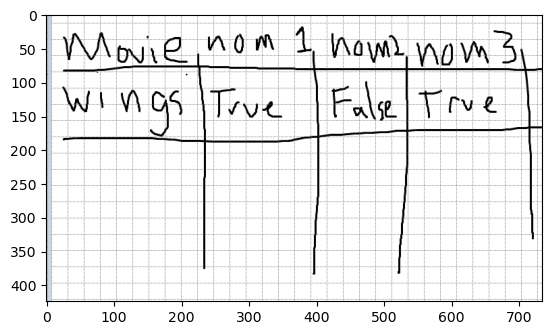

In [146]:
img = Image.open('nom_example.png')
plt.imshow(img)

In [147]:
noms_arry = oscars['nominations'].unique() # First lets look at the all nominations
noms_arry.tolist()

['Best Picture, Production',
 'Best Effects, Engineering Effects',
 'Best Actress in a Leading Role',
 'Best Director, Dramatic Picture',
 'Best Writing, Adaptation',
 'Best Art Direction',
 'Best Picture',
 'Best Director',
 'Best Actor in a Leading Role',
 'Best Writing, Achievement',
 'Best Cinematography',
 'Best Sound, Recording',
 'Best Writing, Original Story',
 'Best Film Editing',
 'Best Assistant Director',
 'Best Music, Original Song',
 'Best Music, Score',
 'Best Writing, Screenplay',
 'Best Dance Direction',
 'Best Actress in a Supporting Role',
 'Best Actor in a Supporting Role',
 'Best Music, Original Score',
 'Best Music, Scoring',
 'Best Cinematography, Color',
 'Best Effects, Special Effects',
 'Best Cinematography, Black-and-White',
 'Best Art Direction, Black-and-White',
 'Best Writing, Original Screenplay',
 'Best Art Direction-Interior Decoration, Black-and-White',
 'Best Music, Scoring of a Dramatic Picture',
 'Best Art Direction-Interior Decoration, Color',
 'Be

In [264]:
n = len(noms_arry.tolist())
print('There are', n, 'nominations')

There are 98 nominations


## 98 nominations seems like alot. Some exploring will need to be done
### As of today there are 24 categories up for nominations(story and original screenplay combined). 
### Furthermore 10 have been reitired as a category
#### *This info was gathered from https://www.awardsandshows.com/features/awards-categories-1.html

In [148]:
#Since this data was gathered from a list of movies that were nominated for best picture. We should remove that nomination.
oscars_noms = oscars.drop(oscars[oscars.nominations.isin([
    "Best Picture, Production", "Best Picture","Best Motion Picture of the Year",'Best Picture, Production'])].index) # Removing rows

In [149]:
# Removing 10 retired categoires
retired = pd.read_csv(r"C:\Users\kylep\Documents\Work things\Projects\Python\Oscars\retired_osc_cat.csv")
retired.head(10)

,category
0,Best Assistant Director
1,Best Dance Direction
2,Best Engineering Effects
3,Best Original Musical or Comedy Score
4,Best Score - Adaptation or Treatment
5,Best Short Film - Color
6,Best Short Film - Live Action 2 Reels
7,Best Title Writing
8,Best Unique and Artistic Quality of Production
9,Short Film - Novelty


In [150]:
oscars_noms = oscars_noms.drop(oscars_noms[oscars_noms.nominations.isin([
    'Best Assistant Director','Best Effects, Engineering Effects','Best Dance Direction',
    'Best Music, Scoring of Music, Adaptation or Treatment','Best Music, Scoring of a Dramatic or Comedy Picture',
    'Best Music, Scoring of a Musical Picture'
    
])].index)

### Since there is no easy way of consolidating all nominations I will go through all 25 categories and see if they are named something else and combine them.

#### My process was simple:
 - Look up the unqiue occurrence of nomination based on key word
 - Look at the history of nomination and see if there has been any changes to the award throughout the years
 - Make the change in one massive cell, that contains all the other changes

In [151]:
#Best actor in a leading role
cat1 = oscars_noms[oscars_noms.nominations.str.contains("Actor")]
cat1['nominations'].unique()

array(['Best Actor in a Leading Role', 'Best Actor in a Supporting Role',
       'Best Performance by an Actor in a Leading Role',
       'Best Performance by an Actor in a Supporting Role'], dtype=object)

In [152]:
#Best actor in supporting role
cat2 = oscars_noms[oscars_noms.nominations.str.contains("Supporting")]
cat2['nominations'].unique()

array(['Best Actress in a Supporting Role',
       'Best Actor in a Supporting Role',
       'Best Performance by an Actor in a Supporting Role',
       'Best Performance by an Actress in a Supporting Role'],
      dtype=object)

In [153]:
#Best Actress in a Leading Role
cat3 = oscars_noms[oscars_noms.nominations.str.contains("Actress")]
cat3['nominations'].unique()

array(['Best Actress in a Leading Role',
       'Best Actress in a Supporting Role',
       'Best Performance by an Actress in a Leading Role',
       'Best Performance by an Actress in a Supporting Role'],
      dtype=object)

In [154]:
#Best Actress in a Supporting Role
cat4 = oscars_noms[oscars_noms.nominations.str.contains("Actress")]
cat4['nominations'].unique()

array(['Best Actress in a Leading Role',
       'Best Actress in a Supporting Role',
       'Best Performance by an Actress in a Leading Role',
       'Best Performance by an Actress in a Supporting Role'],
      dtype=object)

In [155]:
#Best Adapted Screenplay
cat5 = oscars_noms[oscars_noms.nominations.str.contains("Adapted")]
cat5['nominations'].unique()

array(['Best Writing, Best Screenplay - Adapted',
       'Best Writing, Screenplay Adapted From Other Material',
       'Best Writing, Adapted Screenplay', 'Best Adapted Screenplay'],
      dtype=object)

In [156]:
#Best Animated Feature
cat6 = oscars_noms[oscars_noms.nominations.str.contains("Animated")]
cat6['nominations'].unique()

array(['Best Animated Feature Film of the Year'], dtype=object)

In [157]:
#Best Animated Short Film
cat7 = oscars_noms[oscars_noms.nominations.str.contains("Short")]
cat7['nominations'].unique()

array([], dtype=object)

In [158]:
#Best Art Direction
cat8 = oscars_noms[oscars_noms.nominations.str.contains("Art")]
cat8['nominations'].unique()

array(['Best Art Direction', 'Best Art Direction, Black-and-White',
       'Best Art Direction-Interior Decoration, Black-and-White',
       'Best Art Direction-Interior Decoration, Color',
       'Best Art Direction-Set Decoration, Black-and-White',
       'Best Art Direction-Set Decoration, Color',
       'Best Art Direction-Set Decoration',
       'Best Art Direction-Set Decoration, Black-and-White or Color',
       'Best Achievement in Art Direction'], dtype=object)

In [159]:
#Best Cinematography
cat9 = oscars_noms[oscars_noms.nominations.str.contains("Cinematography")]
cat9['nominations'].unique()

array(['Best Cinematography', 'Best Cinematography, Color',
       'Best Cinematography, Black-and-White',
       'Best Achievement in Cinematography'], dtype=object)

In [160]:
#Best Costume Design
cat10 = oscars_noms[oscars_noms.nominations.str.contains("Costume")]
cat10['nominations'].unique()

array(['Best Costume Design, Black-and-White',
       'Best Costume Design, Color',
       'Best Costume Design, Black-and-White or Color',
       'Best Costume Design', 'Best Achievement in Costume Design'],
      dtype=object)

In [161]:
#Best Director
cat11 = oscars_noms[oscars_noms.nominations.str.contains("Director")]
cat11['nominations'].unique()

array(['Best Director, Dramatic Picture', 'Best Director'], dtype=object)

In [162]:
cat12 = oscars_noms[oscars_noms.nominations.str.contains("Documentary")]
cat12['nominations'].unique()

array([], dtype=object)

In [163]:
#Best Documentary Short Subject
cat13 = oscars_noms[oscars_noms.nominations.str.contains("Documentary")]
cat13['nominations'].unique()

array([], dtype=object)

In [164]:
#Best Film Editing
cat14 = oscars_noms[oscars_noms.nominations.str.contains("Editing")]
cat14['nominations'].unique()

array(['Best Film Editing', 'Best Effects, Sound Effects Editing',
       'Best Sound Editing', 'Best Achievement in Film Editing',
       'Best Achievement in Sound Editing'], dtype=object)

In [165]:
#Best Foreign Language Film
cat15 = oscars_noms[oscars_noms.nominations.str.contains("Language")]
cat15['nominations'].unique()

array(['Best Foreign Language Film',
       'Best Foreign Language Film of the Year'], dtype=object)

In [166]:
#Best Makeup
cat16 = oscars_noms[oscars_noms.nominations.str.contains("Makeup")]
cat16['nominations'].unique()

array(['Best Makeup', 'Best Achievement in Makeup',
       'Best Achievement in Makeup and Hairstyling'], dtype=object)

In [167]:
#Best Original Score
cat17 = oscars_noms[oscars_noms.nominations.str.contains("Score")]
cat17['nominations'].unique()

array(['Best Music, Score', 'Best Music, Original Score',
       'Best Music, Score - Substantially Original',
       'Best Music, Substantially Original Score',
       'Best Music, Original Music Score',
       'Best Music, Score of a Musical Picture (Original or Adaptation)',
       'Best Music, Original Score for a Motion Picture (not a Musical)',
       'Best Music, Scoring Adaptation and Original Song Score',
       'Best Music, Original Dramatic Score',
       'Best Music, Scoring Original Song Score and/or Adaptation',
       'Best Music, Original Song Score and Its Adaptation or Best Adaptation Score',
       'Best Music, Original Musical or Comedy Score',
       'Best Achievement in Music Written for Motion Pictures, Original Score',
       'Best Achievement in Music Written for Motion Pictures (Original Score)'],
      dtype=object)

In [168]:
#Best Original Screenplay
cat18 = oscars_noms[oscars_noms.nominations.str.contains("Screenplay")]
cat18['nominations'].unique()

array(['Best Writing, Screenplay', 'Best Writing, Original Screenplay',
       'Best Writing, Story and Screenplay',
       'Best Writing, Best Screenplay - Adapted',
       'Best Writing, Screenplay Based on Material from Another Medium',
       'Best Writing, Story and Screenplay - Written Directly for the Screen',
       'Best Writing, Story and Screenplay Based on Material Not Previously Published or Produced',
       'Best Writing, Story and Screenplay Based on Factual Material or Material Not Previously Published or Produced',
       'Best Writing, Screenplay Adapted From Other Material',
       'Best Writing, Screenplay Written Directly for the Screen',
       'Best Writing, Screenplay Based on Material Previously Produced or Published',
       'Best Writing, Adapted Screenplay', 'Best Adapted Screenplay',
       'Best Original Screenplay'], dtype=object)

In [169]:
#Best Original Song
cat19 = oscars_noms[oscars_noms.nominations.str.contains("Song")]
cat19['nominations'].unique()

array(['Best Music, Original Song',
       'Best Music, Scoring Adaptation and Original Song Score',
       'Best Music, Scoring Original Song Score and/or Adaptation',
       'Best Music, Original Song Score and Its Adaptation or Best Adaptation Score',
       'Best Achievement in Music Written for Motion Pictures, Original Song',
       'Best Achievement in Music Written for Motion Pictures (Original Song)'],
      dtype=object)

In [170]:
#Best Sound Editing
cat20 = oscars_noms[oscars_noms.nominations.str.contains("Editing")]
cat20['nominations'].unique()

array(['Best Film Editing', 'Best Effects, Sound Effects Editing',
       'Best Sound Editing', 'Best Achievement in Film Editing',
       'Best Achievement in Sound Editing'], dtype=object)

In [171]:
#Best Sound Mixing
cat21 = oscars_noms[oscars_noms.nominations.str.contains("Sound")]
cat21['nominations'].unique()

array(['Best Sound, Recording', 'Best Sound',
       'Best Effects, Sound Effects',
       'Best Effects, Sound Effects Editing', 'Best Sound Editing',
       'Best Sound Mixing', 'Best Achievement in Sound Mixing',
       'Best Achievement in Sound Editing'], dtype=object)

In [172]:
#Best Visual Effects
cat22 = oscars_noms[oscars_noms.nominations.str.contains("Visual")]
cat22['nominations'].unique()

array(['Best Effects, Special Visual Effects',
       'Best Effects, Visual Effects', 'Best Visual Effects',
       'Best Achievement in Visual Effects'], dtype=object)

In [173]:
#Live Action Short Film
cat23 = oscars_noms[oscars_noms.nominations.str.contains("Short")]
cat23['nominations'].unique()

array([], dtype=object)

In [174]:
oscars_noms['nominations'] = oscars_noms['nominations'].replace(
    {'Best Performance by an Actor in a Leading Role':'Best Actor in a Leading Role',#Best actor in leading role
    'Best Performance by an Actor in a Supporting Role':'Best Actor in a Supporting Role',#Best actor in supporting role
    'Best Performance by an Actress in a Leading Role':'Best Actress in a Leading Role', #'Best Actress in a Leading Role'
    'Best Performance by an Actress in a Supporting Role':'Best Actress in a Supporting Role', #Best Actress in a Supporting Role
    'Best Writing, Best Screenplay - Adapted':'Best Adapted Screenplay', #Best Adapted Screenplay
        'Best Writing, Screenplay Adapted From Other Material':'Best Adapted Screenplay',
        'Best Writing, Adapted Screenplay': 'Best Adapted Screenplay',
        'Best Writing, Adaptation':'Best Adapted Screenplay',
    'Best Art Direction, Black-and-White': 'Best Art Direction', #Best Art Direction
       'Best Art Direction-Interior Decoration, Black-and-White':'Best Art Direction',
        'Best Achievement in Production Design':'Best Art Direction',
       'Best Art Direction-Interior Decoration, Color': 'Best Art Direction',
       'Best Art Direction-Set Decoration, Black-and-White':'Best Art Direction',
       'Best Art Direction-Set Decoration, Color':'Best Art Direction',
       'Best Art Direction-Set Decoration':'Best Art Direction',
       'Best Art Direction-Set Decoration, Black-and-White or Color':'Best Art Direction',
       'Best Achievement in Art Direction':'Best Art Direction',
    'Best Cinematography, Color':'Best Cinematography', #Best Cinematography
       'Best Cinematography, Black-and-White':'Best Cinematography',
       'Best Achievement in Cinematography':'Best Cinematography',
    'Best Costume Design, Black-and-White':'Best Costume Design', #Best Costume Design
       'Best Costume Design, Color':'Best Costume Design',
       'Best Costume Design, Black-and-White or Color':'Best Costume Design',
       'Best Achievement in Costume Design':'Best Costume Design',
    'Best Director, Dramatic Picture':'Best Director',#Best Director
         'Best Achievement in Directing':'Best Director',
    'Best Sound Editing':'Best Film Editing',#Best Film Editing
       'Best Achievement in Film Editing':'Best Film Editing',
    'Best Foreign Language Film of the Year':'Best Foreign Language Film',#Best Foreign Language Film
        'Best International Feature Film':'Best Foreign Language Film',
    'Best Achievement in Makeup':'Best Makeup',#Best Makeup
       'Best Achievement in Makeup and Hairstyling':'Best Makeup',
    'Best Music, Score':'Best Original Score',#Best Original Score
        'Best Music, Original Score':'Best Original Score',
        'Best Music, Scoring':'Best Original Score',
        'Best Music, Scoring of a Dramatic Picture':'Best Original Score',
       'Best Music, Score - Substantially Original':'Best Original Score',
       'Best Music, Substantially Original Score':'Best Original Score',
       'Best Music, Original Music Score':'Best Original Score',
       'Best Music, Score of a Musical Picture (Original or Adaptation)':'Best Original Score',
       'Best Music, Original Score for a Motion Picture (not a Musical)':'Best Original Score',
       'Best Music, Scoring Adaptation and Original Song Score':'Best Original Score',
       'Best Music, Original Dramatic Score':'Best Original Score',
       'Best Music, Scoring Original Song Score and/or Adaptation':'Best Original Score',
       'Best Music, Original Song Score and Its Adaptation or Best Adaptation Score':'Best Original Score',
       'Best Music, Original Musical or Comedy Score':'Best Original Score',
       'Best Achievement in Music Written for Motion Pictures, Original Score':'Best Original Score',
       'Best Achievement in Music Written for Motion Pictures (Original Score)':'Best Original Score',
    'Best Writing, Screenplay':'Best Original Screenplay',#Best Original Screenplay
        'Best Writing, Original Screenplay':'Best Original Screenplay',
         'Best Writing, Achievement':'Best Original Screenplay',
       'Best Writing, Story and Screenplay':'Best Original Screenplay',
       'Best Writing, Story and Screenplay - Written Directly for the Screen':'Best Original Screenplay',
       'Best Writing, Screenplay Written Directly for the Screen':'Best Original Screenplay',
        'Best Writing, Screenplay Based on Material from Another Medium':'Best Original Screenplay',
       'Best Writing, Story and Screenplay Based on Material Not Previously Published or Produced':'Best Original Screenplay',
       'Best Writing, Story and Screenplay Based on Factual Material or Material Not Previously Published or Produced':'Best Original Screenplay',
       'Best Writing, Screenplay Based on Material Previously Produced or Published':'Best Original Screenplay',
        'Best Writing, Original Story':'Best Original Screenplay',
       'Best Writing, Motion Picture Story':'Best Original Screenplay',
     'Best Music, Original Song':'Best Original Song',#Best Original Song
       'Best Achievement in Music Written for Motion Pictures, Original Song':'Best Original Song',
       'Best Achievement in Music Written for Motion Pictures (Original Song)':'Best Original Song',
     'Best Effects, Sound Effects Editing':'Best Sound Editing', #Best Sound Editing
         'Best Achievement in Sound Editing': 'Best Sound Editing',
     'Best Sound, Recording':'Best Sound Mixing',#Best Sound Mixing
       'Best Effects, Sound Effects':'Best Sound Mixing',
       'Best Achievement in Sound Mixing':'Best Sound Mixing',
        'Best Sound':'Best Sound Mixing',
     'Best Effects, Special Visual Effects':'Best Visual Effects',#Best Visual Effects
       'Best Effects, Visual Effects':'Best Visual Effects',
       'Best Achievement in Visual Effects':'Best Visual Effects',
         'Best Effects, Special Effects':'Best Visual Effects'
    })


In [175]:
len(oscars_noms['nominations'].unique().tolist())

19

In [176]:
allcat = oscars_noms[~oscars_noms['nominations'].isin(['Best Original Song',
'Best Sound Mixing',
'Best Visual Effects',
'Best Actor in a Leading Role',
'Best Actor in a Supporting Role',
'Best Actress in a Leading Role',
'Best Actress in a Supporting Role',
'Best Adapted Screenplay',
'Best Art Direction',
'Best Cinematography',
'Best Costume Design',
'Best Director',
'Best Foreign Language Film',
'Best Makeup',
'Best Original Score',
'Best Original Screenplay',
'Best Film Editing',
'Best Animated Feature Film of the Year',
'Best Sound Editing'])]
allcat['nominations'].unique().tolist() #Making sure there are no more unaccounted categories

[]

In [177]:
oscars_noms['nominations'].unique().tolist() #19 cats

['Best Actress in a Leading Role',
 'Best Director',
 'Best Adapted Screenplay',
 'Best Art Direction',
 'Best Actor in a Leading Role',
 'Best Original Screenplay',
 'Best Cinematography',
 'Best Sound Mixing',
 'Best Film Editing',
 'Best Original Song',
 'Best Original Score',
 'Best Actress in a Supporting Role',
 'Best Actor in a Supporting Role',
 'Best Visual Effects',
 'Best Costume Design',
 'Best Foreign Language Film',
 'Best Makeup',
 'Best Sound Editing',
 'Best Animated Feature Film of the Year']

### Accounting for the combination of story and screenplay, big picture, and 4 other categories that were not mentioned in this dataset we have a total of 19 other categories

#### Now we can begin to transpose the unquie nominations into its own column

In [178]:
for column in oscars_noms['nominations'].unique():
    oscars_noms[column] = (oscars_noms["nominations"] == column)#Im placing every nomination as its own column to help the data frame become normalized

In [179]:
len(oscars_noms.columns)

32

In [180]:
oscars_noms.head(100) 

,movie_number,Title,Date,Viewership_Rating,IMDb Rating,Country of Origin,Production Company,nominations,Genre 1,Genre 2,Genre 3,Duration,adj_Budget,Best Actress in a Leading Role,Best Director,Best Adapted Screenplay,Best Art Direction,Best Actor in a Leading Role,Best Original Screenplay,Best Cinematography,Best Sound Mixing,Best Film Editing,Best Original Song,Best Original Score,Best Actress in a Supporting Role,Best Actor in a Supporting Role,Best Visual Effects,Best Costume Design,Best Foreign Language Film,Best Makeup,Best Sound Editing,Best Animated Feature Film of the Year
3,2,7th Heaven,1927,Not Rated,7.60,United States,Frank Borzage Production,Best Actress in a Leading Role,Drama,Romance,Romance,130.76,1300000.00,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2,7th Heaven,1927,Not Rated,7.60,United States,Frank Borzage Production,Best Director,Drama,Romance,Romance,130.76,1300000.00,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,2,7th Heaven,1927,Not Rated,7.60,United States,Frank Borzage Production,Best Adapted Screenplay,Drama,Romance,Romance,130.76,1300000.00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,2,7th Heaven,1927,Not Rated,7.60,United States,Frank Borzage Production,Best Art Direction,Drama,Romance,Romance,130.76,1300000.00,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,4,The Broadway Melody,1929,Passed,5.60,United States,Metro-Goldwyn-Mayer (MGM),Best Actress in a Leading Role,Drama,Musical,Romance,100.00,379000.00,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,4,The Broadway Melody,1929,Passed,5.60,United States,Metro-Goldwyn-Mayer (MGM),Best Director,Drama,Musical,Romance,100.00,379000.00,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12,5,In Old Arizona,1928,Passed,5.50,United States,Fox Film Corporation,Best Actor in a Leading Role,Drama,Western,Western,95.00,1000000.00,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13,5,In Old Arizona,1928,Passed,5.50,United States,Fox Film Corporation,Best Director,Drama,Western,Western,95.00,1000000.00,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14,5,In Old Arizona,1928,Passed,5.50,United States,Fox Film Corporation,Best Original Screenplay,Drama,Western,Western,95.00,1000000.00,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
15,5,In Old Arizona,1928,Passed,5.50,United States,Fox Film Corporation,Best Cinematography,Drama,Western,Western,95.00,1000000.00,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [181]:
oscars_noms.info()# no more nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3092 entries, 3 to 3757
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   movie_number                            3092 non-null   int64  
 1   Title                                   3092 non-null   object 
 2   Date                                    3092 non-null   int64  
 3   Viewership_Rating                       3092 non-null   object 
 4   IMDb Rating                             3092 non-null   float64
 5   Country of Origin                       3092 non-null   object 
 6   Production Company                      3092 non-null   object 
 7   nominations                             3092 non-null   object 
 8   Genre 1                                 3092 non-null   object 
 9   Genre 2                                 3092 non-null   object 
 10  Genre 3                                 3092 non-null   obje

## Despite all of that the dataset is still not normlized because there are still duplicates. Transposing only added new columns and did not remove the duplicates. However it did make it easier to consolidate the dataset

### Consildate to make unqiue values

In [182]:
oscars_noms.groupby('movie_number').agg(lambda grp: grp.nlargest(1).max()).reset_index()

C:\Users\kylep\AppData\Local\Temp\ipykernel_14692\3579644248.py:1: FutureWarning: ['Title', 'Viewership_Rating', 'Country of Origin', 'Production Company', 'nominations', 'Genre 1', 'Genre 2', 'Genre 3'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  oscars_noms.groupby('movie_number').agg(lambda grp: grp.nlargest(1).max()).reset_index()


,movie_number,Date,IMDb Rating,Duration,adj_Budget,Best Actress in a Leading Role,Best Director,Best Adapted Screenplay,Best Art Direction,Best Actor in a Leading Role,Best Original Screenplay,Best Cinematography,Best Sound Mixing,Best Film Editing,Best Original Song,Best Original Score,Best Actress in a Supporting Role,Best Actor in a Supporting Role,Best Visual Effects,Best Costume Design,Best Foreign Language Film,Best Makeup,Best Sound Editing,Best Animated Feature Film of the Year
0,2,1927,7.60,130.76,1.300000e+06,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,4,1929,5.60,100.00,3.790000e+05,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,5,1928,5.50,95.00,1.000000e+06,False,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,6,1928,7.62,130.76,1.000000e+06,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,8,1929,5.70,91.00,5.596667e+05,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,9,1930,8.10,152.00,1.200000e+06,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
6,10,1929,6.10,90.00,5.596667e+05,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
7,11,1929,7.00,107.00,6.500000e+05,False,True,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False
8,12,1930,7.10,87.00,4.140000e+05,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False
9,13,1930,6.70,84.00,3.406910e+05,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


### You might be wondering as to why I didnt just group by the Title. That is becaue there were about 6 movies that have the same name. In other words remakes were considered there own movie. Here I had choice on making the combination of title and date the unique identifer or just make movie number be the identifer . Furthermore, since I know I will be predicting the 2023 best picture I wanted a bit of suspense when I have finally have my predciton.

#### "Movie 587 is predicted to win". Look up movie_number 587.

## Done with Cleaning. Time to do some things to prep the data for a predticion model.
### Since we know that winning the oscars is a classifer our data will need one as well. That way the model knows what to look for.


In [184]:
# First thing I need is a list of every past winner
winners = pd.read_csv(r"C:\Users\kylep\Documents\Work things\Projects\Python\Oscars\EveryBestPictureWinner.csv")

In [185]:
winners.head() # We only need the titles

,web-scraper-order,web-scraper-start-url,Title,Date,Unnamed: 4
0,1685170429-1,https://www.imdb.com/search/title/?count=100&g...,Everything Everywhere All at Once,2022,True
1,1685170429-2,https://www.imdb.com/search/title/?count=100&g...,CODA,2021,True
2,1685170429-3,https://www.imdb.com/search/title/?count=100&g...,Nomadland,2020,True
3,1685170429-4,https://www.imdb.com/search/title/?count=100&g...,Parasite,2019,True
4,1685170429-5,https://www.imdb.com/search/title/?count=100&g...,Green Book,2018,True


In [186]:
winners = winners.rename(columns={'Unnamed: 4': 'Winner'})

In [187]:
winners.drop(['web-scraper-order', 'web-scraper-start-url'], axis=1, inplace=True)

In [188]:
winners['Title'].value_counts().sum()

96

In [191]:
winners.head()

,Title,Date,Winner
0,Everything Everywhere All at Once,2022,True
1,CODA,2021,True
2,Nomadland,2020,True
3,Parasite,2019,True
4,Green Book,2018,True


In [190]:
oscars_noms.head()

,movie_number,Title,Date,Viewership_Rating,IMDb Rating,Country of Origin,Production Company,nominations,Genre 1,Genre 2,Genre 3,Duration,adj_Budget,Best Actress in a Leading Role,Best Director,Best Adapted Screenplay,Best Art Direction,Best Actor in a Leading Role,Best Original Screenplay,Best Cinematography,Best Sound Mixing,Best Film Editing,Best Original Song,Best Original Score,Best Actress in a Supporting Role,Best Actor in a Supporting Role,Best Visual Effects,Best Costume Design,Best Foreign Language Film,Best Makeup,Best Sound Editing,Best Animated Feature Film of the Year
3,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,Best Actress in a Leading Role,Drama,Romance,Romance,130.76,1300000.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,Best Director,Drama,Romance,Romance,130.76,1300000.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,Best Adapted Screenplay,Drama,Romance,Romance,130.76,1300000.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,Best Art Direction,Drama,Romance,Romance,130.76,1300000.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,4,The Broadway Melody,1929,Passed,5.6,United States,Metro-Goldwyn-Mayer (MGM),Best Actress in a Leading Role,Drama,Musical,Romance,100.00,379000.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [192]:
df_osc = pd.merge(oscars_noms,winners,how="left",on=['Title','Date']) #combing the two dataframes

In [193]:
df_osc.head()

,movie_number,Title,Date,Viewership_Rating,IMDb Rating,Country of Origin,Production Company,nominations,Genre 1,Genre 2,Genre 3,Duration,adj_Budget,Best Actress in a Leading Role,Best Director,Best Adapted Screenplay,Best Art Direction,Best Actor in a Leading Role,Best Original Screenplay,Best Cinematography,Best Sound Mixing,Best Film Editing,Best Original Song,Best Original Score,Best Actress in a Supporting Role,Best Actor in a Supporting Role,Best Visual Effects,Best Costume Design,Best Foreign Language Film,Best Makeup,Best Sound Editing,Best Animated Feature Film of the Year,Winner
0,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,Best Actress in a Leading Role,Drama,Romance,Romance,130.76,1300000.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
1,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,Best Director,Drama,Romance,Romance,130.76,1300000.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
2,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,Best Adapted Screenplay,Drama,Romance,Romance,130.76,1300000.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
3,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,Best Art Direction,Drama,Romance,Romance,130.76,1300000.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
4,4,The Broadway Melody,1929,Passed,5.6,United States,Metro-Goldwyn-Mayer (MGM),Best Actress in a Leading Role,Drama,Musical,Romance,100.00,379000.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [194]:
df_osc['Winner'] = df_osc['Winner'].fillna(False) #Filling all instance of naan with False

In [197]:
df_osc['Winner'].dtypes #Making sure the winner feature is a true or false category

dtype('bool')

In [198]:
df = df_osc.groupby('movie_number').agg(lambda grp: grp.nlargest(1).max()).reset_index() #Normalizing the combined dataframe

C:\Users\kylep\AppData\Local\Temp\ipykernel_14692\1046796167.py:1: FutureWarning: ['Title', 'Viewership_Rating', 'Country of Origin', 'Production Company', 'nominations', 'Genre 1', 'Genre 2', 'Genre 3'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df = df_osc.groupby('movie_number').agg(lambda grp: grp.nlargest(1).max()).reset_index() #Normalizing the combined dataframe


In [199]:
df.head()

,movie_number,Date,IMDb Rating,Duration,adj_Budget,Best Actress in a Leading Role,Best Director,Best Adapted Screenplay,Best Art Direction,Best Actor in a Leading Role,Best Original Screenplay,Best Cinematography,Best Sound Mixing,Best Film Editing,Best Original Song,Best Original Score,Best Actress in a Supporting Role,Best Actor in a Supporting Role,Best Visual Effects,Best Costume Design,Best Foreign Language Film,Best Makeup,Best Sound Editing,Best Animated Feature Film of the Year,Winner
0,2,1927,7.60,130.76,1300000.00,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,4,1929,5.60,100.00,379000.00,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,5,1928,5.50,95.00,1000000.00,False,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,6,1928,7.62,130.76,1000000.00,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,8,1929,5.70,91.00,559666.67,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [200]:
df['Winner'].value_counts()#There should be 96 winners

False    480
True      93
Name: Winner, dtype: int64

In [201]:
df_osc.groupby('Title').agg({'Winner':'max'})#Checking which movies are not listed as true

,Winner
Title,
12 Angry Men,False
12 Years a Slave,True
127 Hours,False
1917,False
42nd Street,False
49th Parallel,False
7th Heaven,False
A Beautiful Mind,True
A Clockwork Orange,False


## Checking which Movies were not selected as winners when they should have

In [204]:
array = oscars_noms['Title'].unique() #Making an array with all movie titles

In [205]:
winners[~winners.Title.isin(array)] #Filtering out all movies that should be in the winners dataframe that arent

,Title,Date,Winner
90,Grand Hotel,1932,True
94,Wings,1927,True
95,Sunrise,1927,True


### Exploring the three titles

In [207]:
df_osc[df_osc['Title'] == 'Sunrise']

,movie_number,Title,Date,Viewership_Rating,IMDb Rating,Country of Origin,Production Company,nominations,Genre 1,Genre 2,Genre 3,Duration,adj_Budget,Best Actress in a Leading Role,Best Director,Best Adapted Screenplay,Best Art Direction,Best Actor in a Leading Role,Best Original Screenplay,Best Cinematography,Best Sound Mixing,Best Film Editing,Best Original Song,Best Original Score,Best Actress in a Supporting Role,Best Actor in a Supporting Role,Best Visual Effects,Best Costume Design,Best Foreign Language Film,Best Makeup,Best Sound Editing,Best Animated Feature Film of the Year,Winner


#### After some research it seems this movie had some contervesy in terms of its title as best picture. One of them being that the award was later taken away. This is the reason as to why my orginal dataframe that contained all movies nominated did not match the winners dataframe. You can read more about it in here: https://www.slashfilm.com/1171357/sunrise-is-the-only-best-picture-oscar-winner-the-academy-doesnt-recognize/

In [208]:
df_osc[df_osc['Title'] == 'Grand Hotel']

,movie_number,Title,Date,Viewership_Rating,IMDb Rating,Country of Origin,Production Company,nominations,Genre 1,Genre 2,Genre 3,Duration,adj_Budget,Best Actress in a Leading Role,Best Director,Best Adapted Screenplay,Best Art Direction,Best Actor in a Leading Role,Best Original Screenplay,Best Cinematography,Best Sound Mixing,Best Film Editing,Best Original Song,Best Original Score,Best Actress in a Supporting Role,Best Actor in a Supporting Role,Best Visual Effects,Best Costume Design,Best Foreign Language Film,Best Makeup,Best Sound Editing,Best Animated Feature Film of the Year,Winner


#### This movie is the only movie ever to not be nominated for any other category and still win best picture. Thus when I consolidated my data frame it was left out

#### Considering these two movies were somewhat of anonmly I will preceded without them

In [209]:
df_osc[df_osc['Title'] == 'Wings']

,movie_number,Title,Date,Viewership_Rating,IMDb Rating,Country of Origin,Production Company,nominations,Genre 1,Genre 2,Genre 3,Duration,adj_Budget,Best Actress in a Leading Role,Best Director,Best Adapted Screenplay,Best Art Direction,Best Actor in a Leading Role,Best Original Screenplay,Best Cinematography,Best Sound Mixing,Best Film Editing,Best Original Song,Best Original Score,Best Actress in a Supporting Role,Best Actor in a Supporting Role,Best Visual Effects,Best Costume Design,Best Foreign Language Film,Best Makeup,Best Sound Editing,Best Animated Feature Film of the Year,Winner


#### The reason why this movie no longer exsits in my dataframe is that the nominations that it earned was for best picture and Best Effects, Engineering Effects. Both of which were removed during the nomination portion of cleaning. 

### Since only three movies were not accounted for and they were some what of outliers I will continue without them 

# =============================================================

## Although we already know who the 2023 winner is we are still in the middle of the 2024 running and thus dont know which movies will be nominated for the 2024 oscars. Thus we will remove the 2023 nominees and try to predict them.

### The first thing we have to do is remove those movies from the main data and categorize it as our unseen data set

In [211]:
df.head() #Norm dataset

,movie_number,Date,IMDb Rating,Duration,adj_Budget,Best Actress in a Leading Role,Best Director,Best Adapted Screenplay,Best Art Direction,Best Actor in a Leading Role,Best Original Screenplay,Best Cinematography,Best Sound Mixing,Best Film Editing,Best Original Song,Best Original Score,Best Actress in a Supporting Role,Best Actor in a Supporting Role,Best Visual Effects,Best Costume Design,Best Foreign Language Film,Best Makeup,Best Sound Editing,Best Animated Feature Film of the Year,Winner
0,2,1927,7.60,130.76,1300000.00,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,4,1929,5.60,100.00,379000.00,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,5,1928,5.50,95.00,1000000.00,False,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,6,1928,7.62,130.76,1000000.00,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,8,1929,5.70,91.00,559666.67,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [213]:
df_osc.head() #Will first work on on non norm dataset

,movie_number,Title,Date,Viewership_Rating,IMDb Rating,Country of Origin,Production Company,nominations,Genre 1,Genre 2,Genre 3,Duration,adj_Budget,Best Actress in a Leading Role,Best Director,Best Adapted Screenplay,Best Art Direction,Best Actor in a Leading Role,Best Original Screenplay,Best Cinematography,Best Sound Mixing,Best Film Editing,Best Original Song,Best Original Score,Best Actress in a Supporting Role,Best Actor in a Supporting Role,Best Visual Effects,Best Costume Design,Best Foreign Language Film,Best Makeup,Best Sound Editing,Best Animated Feature Film of the Year,Winner
0,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,Best Actress in a Leading Role,Drama,Romance,Romance,130.76,1300000.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,Best Director,Drama,Romance,Romance,130.76,1300000.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,Best Adapted Screenplay,Drama,Romance,Romance,130.76,1300000.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,Best Art Direction,Drama,Romance,Romance,130.76,1300000.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,4,The Broadway Melody,1929,Passed,5.6,United States,Metro-Goldwyn-Mayer (MGM),Best Actress in a Leading Role,Drama,Musical,Romance,100.00,379000.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


### Since we know that the non normalized dataframe(df_osc) is only non normalized becuse of the nomination columns we will convert the dataframe with the remaining features

In [214]:
df_osc = df_osc[['movie_number', 'Title','Viewership_Rating','Country of Origin',
                'Production Company','Genre 1','Genre 2','Genre 3']]

In [215]:
df_osc.head()

,movie_number,Title,Viewership_Rating,Country of Origin,Production Company,Genre 1,Genre 2,Genre 3
0,2,7th Heaven,Not Rated,United States,Frank Borzage Production,Drama,Romance,Romance
1,2,7th Heaven,Not Rated,United States,Frank Borzage Production,Drama,Romance,Romance
2,2,7th Heaven,Not Rated,United States,Frank Borzage Production,Drama,Romance,Romance
3,2,7th Heaven,Not Rated,United States,Frank Borzage Production,Drama,Romance,Romance
4,4,The Broadway Melody,Passed,United States,Metro-Goldwyn-Mayer (MGM),Drama,Musical,Romance


In [216]:
df_osc['movie_number'].nunique()

573

In [217]:
df_osc.drop_duplicates(keep='first', inplace=True) #Normalizing the dataframe

In [218]:
df_osc.head()

,movie_number,Title,Viewership_Rating,Country of Origin,Production Company,Genre 1,Genre 2,Genre 3
0,2,7th Heaven,Not Rated,United States,Frank Borzage Production,Drama,Romance,Romance
4,4,The Broadway Melody,Passed,United States,Metro-Goldwyn-Mayer (MGM),Drama,Musical,Romance
6,5,In Old Arizona,Passed,United States,Fox Film Corporation,Drama,Western,Western
10,6,The Patriot,Not Rated,United States,Paramount Pictures,Drama,History,Thriller
14,8,Alibi,Passed,United States,Feature Productions,Action,Crime,Romance


In [219]:
oscars = pd.merge(df,df_osc,how="left",on=['movie_number']) #merging both dataframes that are now normalized 

In [220]:
oscars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573 entries, 0 to 572
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   movie_number                            573 non-null    int64  
 1   Date                                    573 non-null    int64  
 2   IMDb Rating                             573 non-null    float64
 3   Duration                                573 non-null    float64
 4   adj_Budget                              573 non-null    float64
 5   Best Actress in a Leading Role          573 non-null    bool   
 6   Best Director                           573 non-null    bool   
 7   Best Adapted Screenplay                 573 non-null    bool   
 8   Best Art Direction                      573 non-null    bool   
 9   Best Actor in a Leading Role            573 non-null    bool   
 10  Best Original Screenplay                573 non-null    bool  

In [221]:
osc_2023 = oscars[oscars['Date'] == 2022] #Filtering the movies that were nominated for the 2023 best picture award

In [222]:
osc_2023.drop('Winner', axis=1) 
#Since were are pretending that we still dont who won the 2023 best picture award we need to remove the winner cat

,movie_number,Date,IMDb Rating,Duration,adj_Budget,Best Actress in a Leading Role,Best Director,Best Adapted Screenplay,Best Art Direction,Best Actor in a Leading Role,Best Original Screenplay,Best Cinematography,Best Sound Mixing,Best Film Editing,Best Original Song,Best Original Score,Best Actress in a Supporting Role,Best Actor in a Supporting Role,Best Visual Effects,Best Costume Design,Best Foreign Language Film,Best Makeup,Best Sound Editing,Best Animated Feature Film of the Year,Title,Viewership_Rating,Country of Origin,Production Company,Genre 1,Genre 2,Genre 3
563,582,2022,7.8,139.0,1.430000e+07,True,True,False,False,False,True,False,False,True,True,True,True,True,False,True,False,False,False,False,Everything Everywhere All at Once,R,United States,A24IAC FilmsAGBO,Action,Adventure,Comedy
564,583,2022,7.8,148.0,8.420682e+07,False,False,True,True,False,False,True,True,False,False,True,False,False,True,False,True,True,False,False,All Quiet on the Western Front,R,Germany,Amusement Park FilmsGunpowder FilmsSliding Dow...,Action,Drama,War
565,584,2022,7.7,192.0,3.500000e+08,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,Avatar: The Way of Water,PG-13,United States,20th Century StudiosTSG EntertainmentLightstor...,Action,Adventure,Fantasy
566,585,2022,7.3,159.0,8.500000e+07,False,False,False,True,True,False,True,True,True,False,False,False,False,False,True,False,True,False,False,Elvis,PG-13,United States,Warner Bros.Bazmark FilmsRoadshow Entertainment,Biography,Drama,Music
567,586,2022,7.7,114.0,8.420682e+07,False,True,False,False,True,True,False,False,True,False,True,True,True,False,False,False,False,False,False,The Banshees of Inisherin,R,United Kingdom,Searchlight PicturesFilm4Blueprint Pictures,Comedy,Drama,Drama
568,587,2022,7.6,151.0,4.000000e+07,True,True,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,The Fabelmans,PG-13,United States,Amblin EntertainmentAmblin PartnersReliance En...,Drama,Drama,Drama
569,588,2022,8.3,130.0,1.700000e+08,False,False,True,False,False,False,False,True,True,True,False,False,False,True,False,False,False,False,False,Top Gun: Maverick,PG-13,United States,Paramount PicturesSkydance MediaJerry Bruckhei...,Action,Drama,Drama
570,589,2022,7.3,147.0,1.070000e+07,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Triangle of Sadness,R,United States,Imperative EntertainmentPlattform ProduktionFi...,Comedy,Drama,Drama
571,590,2022,7.5,158.0,2.500000e+07,True,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,Tár,R,United States,Focus FeaturesStandard Film CompanyEMJAG Produ...,Drama,Music,Music
572,591,2022,6.9,104.0,8.420682e+07,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Women Talking,PG-13,United States,Hear/Say ProductionsPlan B Entertainment,Drama,Drama,Drama


In [272]:
movies = oscars[oscars['Date'] != 2022] #Showing off the dataset I will be working in the machine learning part of this project
movies.head()

,movie_number,Title,Date,Viewership_Rating,IMDb Rating,Country of Origin,Production Company,Budget,nominations,Genre 1,Genre 2,Genre 3,Gross Worldwide,Duration
0,1,Wings,1927,PG-13,7.6,United States,Paramount Famous Lasky Corporation,"$2,000,000 (estimated)","Best Picture, Production",Drama,Romance,War,746.0,144.00
1,1,Wings,1927,PG-13,7.6,United States,Paramount Famous Lasky Corporation,"$2,000,000 (estimated)","Best Effects, Engineering Effects",Drama,Romance,War,746.0,144.00
2,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,"$1,300,000 (estimated)","Best Picture, Production",Drama,Romance,NaN,NaN,130.76
3,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,"$1,300,000 (estimated)",Best Actress in a Leading Role,Drama,Romance,NaN,NaN,130.76
4,2,7th Heaven,1927,Not Rated,7.6,United States,Frank Borzage Production,"$1,300,000 (estimated)","Best Director, Dramatic Picture",Drama,Romance,NaN,NaN,130.76


# =============================================================

# Creating two CSV files. One will be my main dataframe that I will train my model on(movies.csv) and the other will be my unseen dataframe(osc_2023.csv)

In [330]:
#osc_2023.to_csv('osc_2023_data.csv', encoding='utf-8')

In [331]:
#movies.to_csv('movie_data.csv', encoding='utf-8')